<a href="https://colab.research.google.com/github/Lizett23/TelecomX_Parte2/blob/main/Telecom_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/df_limpo.csv')
data.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


#Información

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

#Tratamiento de los datos

#Eliminación de columnas irrelevantes
Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [67]:
data = data.drop(columns=['customerID'])

#Encoding
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [68]:
columnas_categoricas = data.select_dtypes(include=['object']).columns
print(columnas_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [69]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Make a copy of the DataFrame
data = data.copy()

# List of categorical columns (automatically detected)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Create column transformer for one-hot encoding
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    remainder='passthrough'  # Keep non-categorical columns
)

# Apply transformation
data_encoded_array = one_hot_encoder.fit_transform(data)

# Get new column names
encoded_col_names = one_hot_encoder.get_feature_names_out()

# Convert to DataFrame
data_encoded = pd.DataFrame(data_encoded_array, columns=encoded_col_names)

# Reset index for safety
data_encoded.reset_index(drop=True, inplace=True)

# Verify result
print(data_encoded.head())

   onehotencoder__Churn_No  onehotencoder__Churn_Yes  \
0                      1.0                       0.0   
1                      1.0                       0.0   
2                      0.0                       1.0   
3                      0.0                       1.0   
4                      0.0                       1.0   

   onehotencoder__customer.gender_Female  onehotencoder__customer.gender_Male  \
0                                    1.0                                  0.0   
1                                    0.0                                  1.0   
2                                    0.0                                  1.0   
3                                    0.0                                  1.0   
4                                    1.0                                  0.0   

   onehotencoder__customer.Partner_No  onehotencoder__customer.Partner_Yes  \
0                                 0.0                                  1.0   
1                   

In [70]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__Churn_No                                         7043 non-null   float64
 1   onehotencoder__Churn_Yes                                        7043 non-null   float64
 2   onehotencoder__customer.gender_Female                           7043 non-null   float64
 3   onehotencoder__customer.gender_Male                             7043 non-null   float64
 4   onehotencoder__customer.Partner_No                              7043 non-null   float64
 5   onehotencoder__customer.Partner_Yes                             7043 non-null   float64
 6   onehotencoder__customer.Dependents_No                           7043 non-null   float64
 7   onehotencoder__customer.Dependents_Yes             

In [71]:
data_encoded.isnull().sum()

,0
onehotencoder__Churn_No,0
onehotencoder__Churn_Yes,0
onehotencoder__customer.gender_Female,0
onehotencoder__customer.gender_Male,0
onehotencoder__customer.Partner_No,0
onehotencoder__customer.Partner_Yes,0
onehotencoder__customer.Dependents_No,0
onehotencoder__customer.Dependents_Yes,0
onehotencoder__phone.PhoneService_No,0
onehotencoder__phone.PhoneService_Yes,0


In [72]:
# Verifica valores nulos en las dos columnas
print(data_encoded[['remainder__Total.Day', 'remainder__account.Charges.Total']].isnull().sum())

remainder__Total.Day                11
remainder__account.Charges.Total    11
dtype: int64


In [73]:
# Elimina filas con valores nulos en las columnas especificadas
data_encoded = data_encoded.dropna(subset=['remainder__Total.Day', 'remainder__account.Charges.Total'])

In [74]:
data_encoded.isnull().sum()

,0
onehotencoder__Churn_No,0
onehotencoder__Churn_Yes,0
onehotencoder__customer.gender_Female,0
onehotencoder__customer.gender_Male,0
onehotencoder__customer.Partner_No,0
onehotencoder__customer.Partner_Yes,0
onehotencoder__customer.Dependents_No,0
onehotencoder__customer.Dependents_Yes,0
onehotencoder__phone.PhoneService_No,0
onehotencoder__phone.PhoneService_Yes,0


#Normalizacion de clases
Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Convert relevant columns to numerical type
numerical_cols_to_convert = [
    'remainder__customer.SeniorCitizen',
    'remainder__customer.tenure',
    'remainder__Total.Day',
    'remainder__account.Charges.Monthly',
    'remainder__account.Charges.Total'
]

for col in numerical_cols_to_convert:
    data_encoded[col] = pd.to_numeric(data_encoded[col], errors='coerce')

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
# Assuming 'remainder__Churn_Yes' is your target variable
numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'remainder__Churn_Yes' in numerical_cols:
    numerical_cols.remove('remainder__Churn_Yes')


# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
data_encoded.loc[:,numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Mostrando los datos normalizados
data_encoded.head()

,onehotencoder__Churn_No,onehotencoder__Churn_Yes,onehotencoder__customer.gender_Female,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_No,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_No,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_No,onehotencoder__phone.PhoneService_Yes,...,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.112676,0.484680,0.471144,0.066294
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.112676,0.431755,0.414428,0.060420
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.042254,0.523677,0.553731,0.030239
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.169014,0.754875,0.793532,0.140670
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.028169,0.699164,0.653234,0.028687


#Correlación

In [76]:
corr = data_encoded.corr()

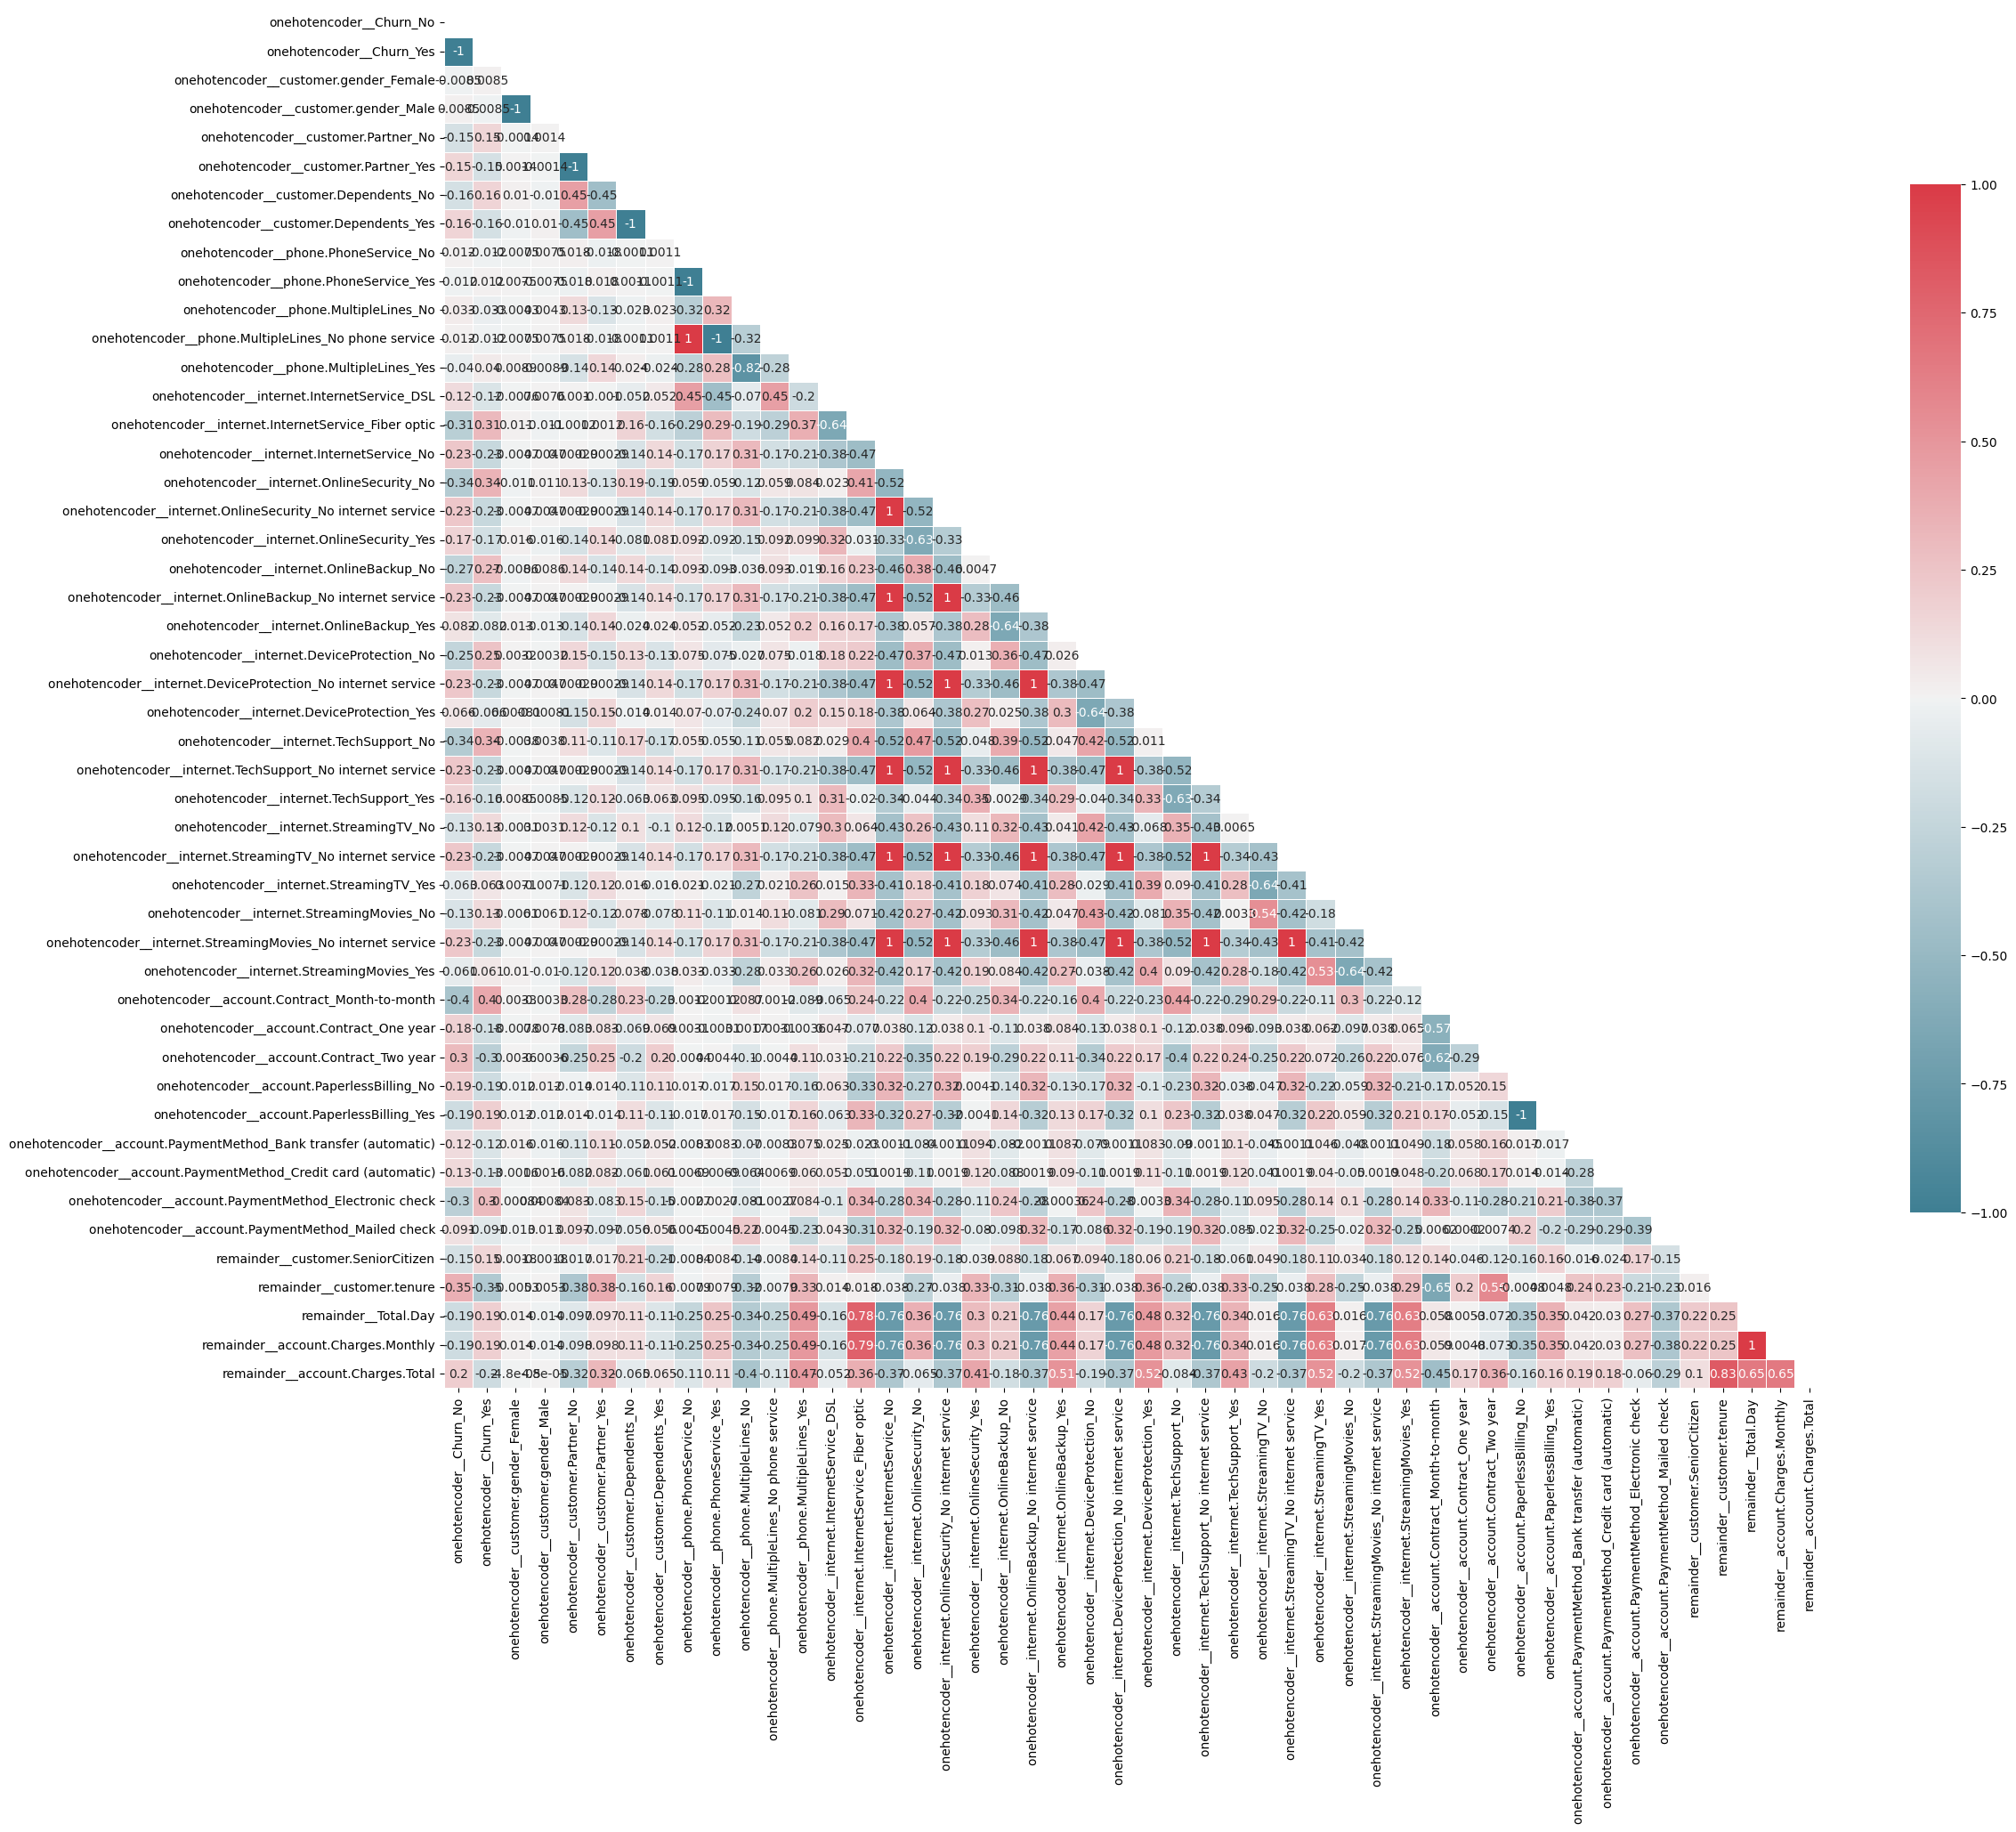

In [77]:
import numpy as np # Import the numpy library

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(25, 30))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

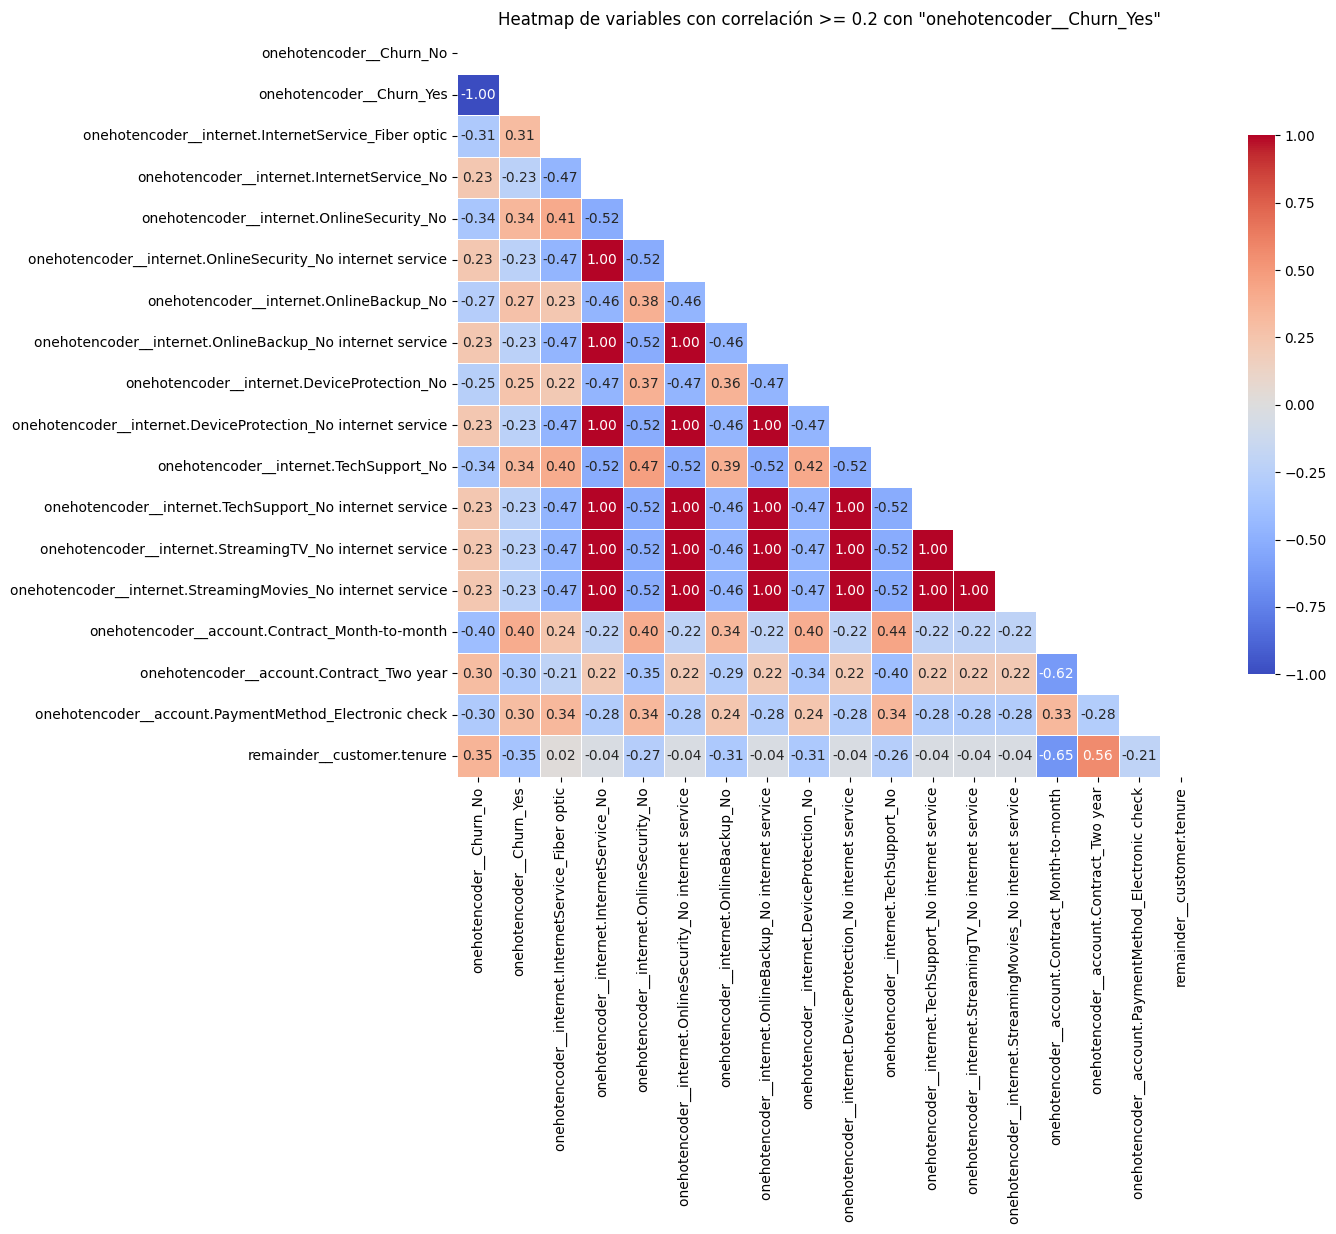

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'onehotencoder__Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

In [79]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

In [80]:
%whos DataFrame

Variable        Type         Data/Info
--------------------------------------
corr            DataFrame                             <...>n\n[48 rows x 48 columns]
corr_filtrada   DataFrame                             <...>               1.000000  
data            DataFrame         Churn customer.gende<...>n[7043 rows x 21 columns]
data_encoded    DataFrame          onehotencoder__Chur<...>n[7032 rows x 48 columns]
df              DataFrame          onehotencoder__Chur<...>n[7032 rows x 50 columns]


#Analisis dirigido

In [81]:
def ancho_bin(df, columna):
    # Calcula el percentil 75 (Q3) y el percentil 25 (Q1) de la columna
    q75, q25 = np.percentile(df[columna], [75, 25])

    # Calcula el rango intercuartílico (IQR), que es Q3 - Q1
    iqr = q75 - q25

    # Aplica la fórmula de Freedman-Diaconis para calcular el ancho óptimo del bin:
    # ancho = 2 * IQR / (n^(1/3)), donde n es el número de datos elevado a la
    # -1/3, negativo porque se aplica la raiz al denominador
    ancho = 2 * iqr * np.power(len(df[columna]), -1/3)

    # Retorna el ancho calculado
    return ancho



In [82]:
print(data_encoded.columns.tolist())

['onehotencoder__Churn_No', 'onehotencoder__Churn_Yes', 'onehotencoder__customer.gender_Female', 'onehotencoder__customer.gender_Male', 'onehotencoder__customer.Partner_No', 'onehotencoder__customer.Partner_Yes', 'onehotencoder__customer.Dependents_No', 'onehotencoder__customer.Dependents_Yes', 'onehotencoder__phone.PhoneService_No', 'onehotencoder__phone.PhoneService_Yes', 'onehotencoder__phone.MultipleLines_No', 'onehotencoder__phone.MultipleLines_No phone service', 'onehotencoder__phone.MultipleLines_Yes', 'onehotencoder__internet.InternetService_DSL', 'onehotencoder__internet.InternetService_Fiber optic', 'onehotencoder__internet.InternetService_No', 'onehotencoder__internet.OnlineSecurity_No', 'onehotencoder__internet.OnlineSecurity_No internet service', 'onehotencoder__internet.OnlineSecurity_Yes', 'onehotencoder__internet.OnlineBackup_No', 'onehotencoder__internet.OnlineBackup_No internet service', 'onehotencoder__internet.OnlineBackup_Yes', 'onehotencoder__internet.DeviceProtec

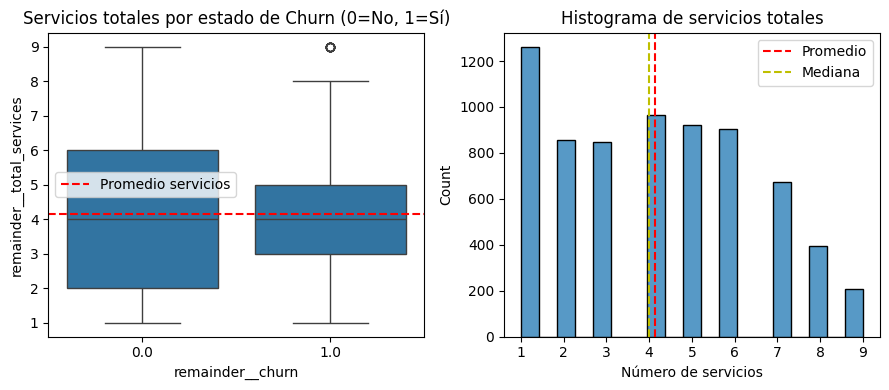

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = data_encoded.copy()

# -------- 1) Construir remainder__total_services --------
# (Cuenta cuántos servicios tiene el cliente: teléfono, multilínea,
# internet base (DSL o Fiber), y add-ons de internet)
yes_cols = [
    'onehotencoder__phone.PhoneService_Yes',
    'onehotencoder__phone.MultipleLines_Yes',
    'onehotencoder__internet.OnlineSecurity_Yes',
    'onehotencoder__internet.OnlineBackup_Yes',
    'onehotencoder__internet.DeviceProtection_Yes',
    'onehotencoder__internet.TechSupport_Yes',
    'onehotencoder__internet.StreamingTV_Yes',
    'onehotencoder__internet.StreamingMovies_Yes'
]

# Internet base = tiene DSL o Fiber (cuenta como 1 servicio)
internet_base = df[['onehotencoder__internet.InternetService_DSL',
                    'onehotencoder__internet.InternetService_Fiber optic']].sum(axis=1).clip(upper=1)

df['remainder__total_services'] = internet_base + df[yes_cols].sum(axis=1)

# -------- 2) Columnas limpias para graficar --------
df['remainder__churn'] = df['onehotencoder__Churn_Yes']  # 0 = No, 1 = Yes

# -------- 3) Estadísticos --------
total_services_media = df['remainder__total_services'].mean()
total_servicios_mediana = df['remainder__total_services'].median()

# (opcional) binwidth con tu función ancho_bin si la tienes definida
try:
    binwidth = ancho_bin(df, 'remainder__total_services')
    if not np.isfinite(binwidth) or binwidth <= 0:
        binwidth = 1.0
except Exception:
    binwidth = 1.0  # fallback sensato para conteos de servicios

# -------- 4) Gráficos --------
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Boxplot: total de servicios vs churn
sns.boxplot(data=df, x='remainder__churn', y='remainder__total_services', ax=ax[0])
ax[0].set_title('Servicios totales por estado de Churn (0=No, 1=Sí)')
ax[0].axhline(y=total_services_media, color='r', linestyle='--', label='Promedio servicios')
ax[0].legend()

# Histograma del total de servicios
sns.histplot(data=df, x='remainder__total_services', ax=ax[1], binwidth=binwidth, edgecolor='black')
ax[1].set_title('Histograma de servicios totales')
ax[1].set_xlabel('Número de servicios')
ax[1].axvline(x=total_services_media, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=total_servicios_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()


In [84]:
%whos DataFrame


Variable        Type         Data/Info
--------------------------------------
corr            DataFrame                             <...>n\n[48 rows x 48 columns]
corr_filtrada   DataFrame                             <...>               1.000000  
data            DataFrame         Churn customer.gende<...>n[7043 rows x 21 columns]
data_encoded    DataFrame          onehotencoder__Chur<...>n[7032 rows x 48 columns]
df              DataFrame          onehotencoder__Chur<...>n[7032 rows x 50 columns]


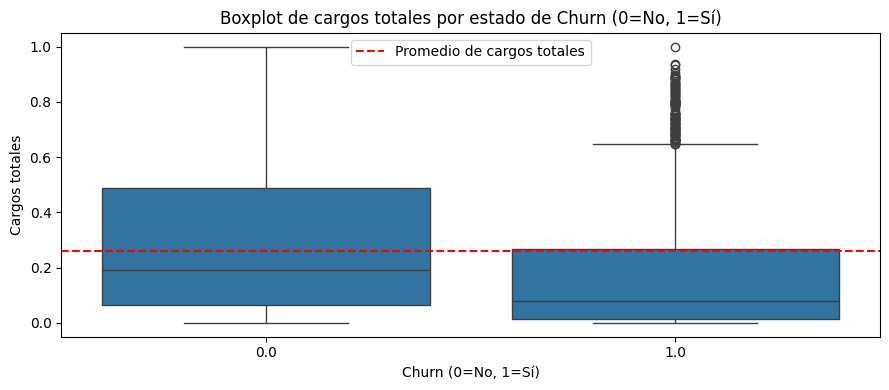

In [87]:
df= data_encoded.copy()
# Calcular el promedio de cargos totales
media_total = df['remainder__account.Charges.Total'].mean()

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9,4))

# Boxplot: comparar cargos totales entre clientes con churn (1) y sin churn (0)
sns.boxplot(data=df,
            x='onehotencoder__Churn_Yes',
            y='remainder__account.Charges.Total',
            ax=ax)

# Título y línea del promedio
ax.set_title('Boxplot de cargos totales por estado de Churn (0=No, 1=Sí)')
ax.axhline(y=media_total, color='r', linestyle='--', label='Promedio de cargos totales')
ax.set_xlabel("Churn (0=No, 1=Sí)")
ax.set_ylabel("Cargos totales")
ax.legend()

plt.tight_layout()
plt.show()


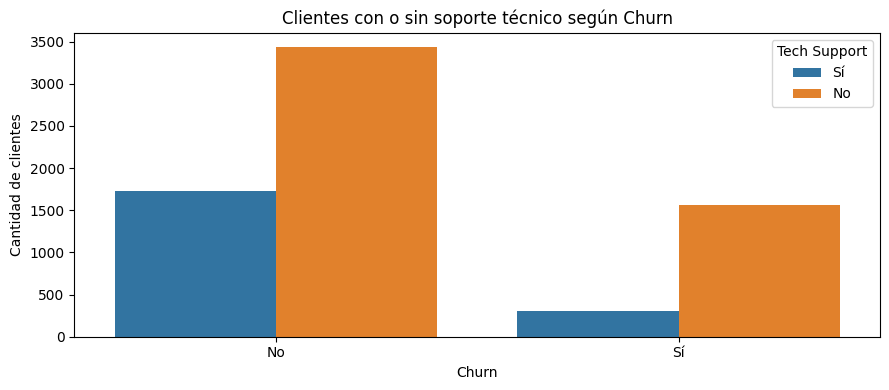

In [89]:
# Calcular el promedio de total_services
df = data_encoded.copy()

# --- 1) Crear columna binaria para Tech Support ---
df['TechSupport'] = df['onehotencoder__internet.TechSupport_Yes'].apply(lambda x: 'Sí' if x == 1 else 'No')

# --- 2) Crear columna Churn binaria legible ---
df['Churn'] = df['onehotencoder__Churn_Yes'].apply(lambda x: 'Sí' if x == 1 else 'No')

# --- 3) Gráfico countplot ---
fig, ax = plt.subplots(figsize=(9,4))
sns.countplot(data=df, x='Churn', hue='TechSupport', ax=ax)

ax.set_title('Clientes con o sin soporte técnico según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Tech Support')

plt.tight_layout()
plt.show()

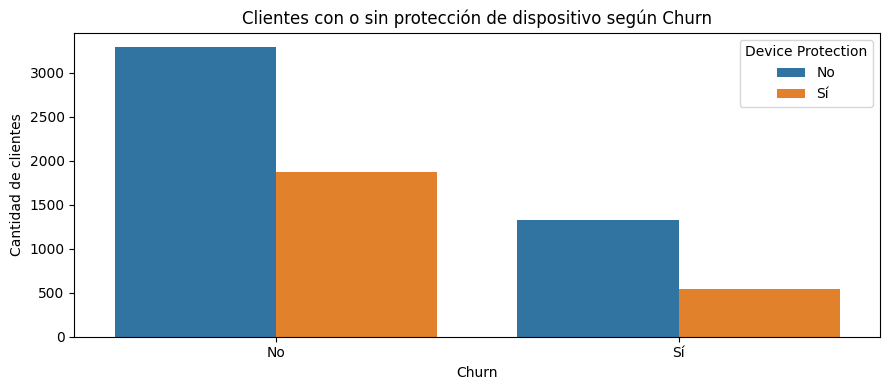

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

df = data_encoded.copy()

# Columna legible para Device Protection (Sí/No)
df['DeviceProtection'] = df['onehotencoder__internet.DeviceProtection_Yes'].apply(lambda x: 'Sí' if x == 1 else 'No')

# Columna legible para Churn (Sí/No)
df['Churn'] = df['onehotencoder__Churn_Yes'].apply(lambda x: 'Sí' if x == 1 else 'No')

# Gráfico
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(data=df, x='Churn', hue='DeviceProtection', ax=ax)

ax.set_title('Clientes con o sin protección de dispositivo según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')
ax.legend(title='Device Protection')

plt.tight_layout()
plt.show()


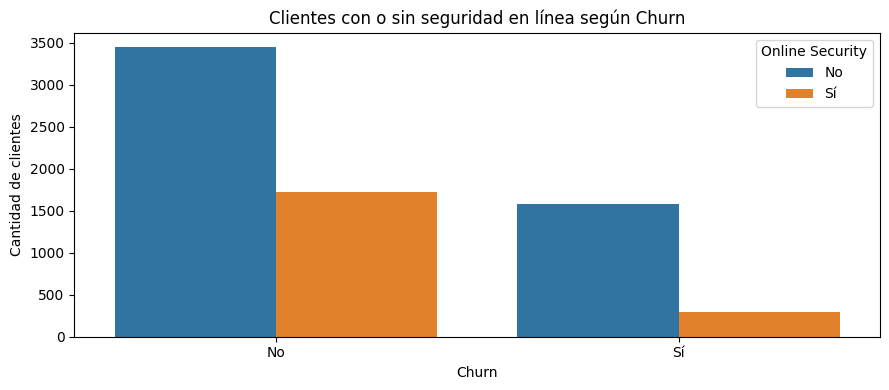

In [91]:

df = data_encoded.copy()

# Columna legible para Online Security
df['OnlineSecurity'] = df['onehotencoder__internet.OnlineSecurity_Yes'].apply(lambda x: 'Sí' if x == 1 else 'No')

# Columna legible para Churn
df['Churn'] = df['onehotencoder__Churn_Yes'].apply(lambda x: 'Sí' if x == 1 else 'No')

# Crear figura y eje
fig, ax = plt.subplots(figsize=(9, 4))

# Gráfico de conteo
sns.countplot(data=df, x='Churn', hue='OnlineSecurity', ax=ax)

# Título y etiquetas
ax.set_title('Clientes con o sin seguridad en línea según Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')

# Leyenda automática (se adapta a los valores)
ax.legend(title='Online Security')

# Ajustes finales
plt.tight_layout()
plt.show()


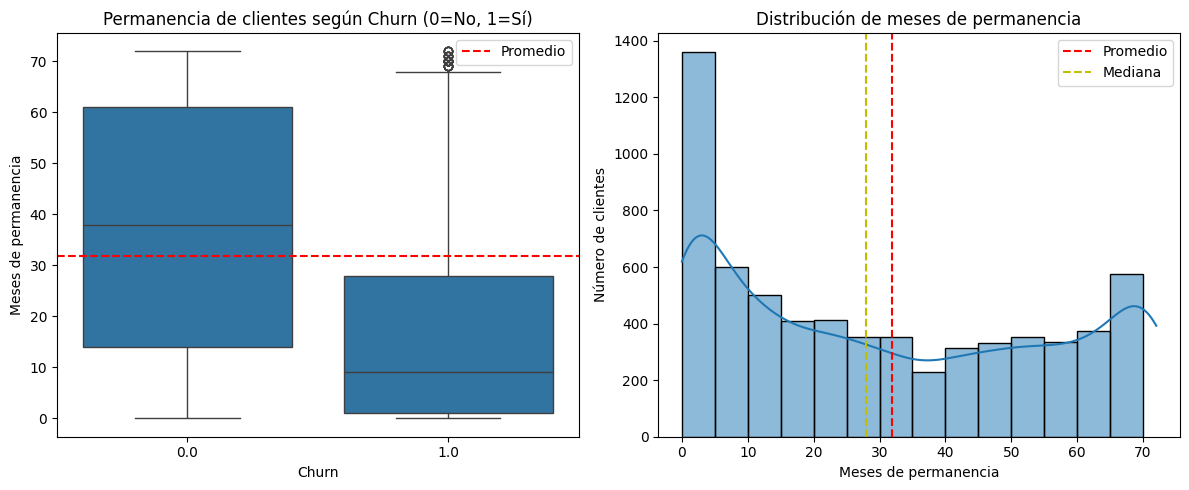

In [102]:
df = data_encoded.copy()

# 1) Crear la columna tenure_meses (desnormalizando de 0–1 a 0–72)
df['tenure_meses'] = (df['remainder__customer.tenure'] * 72).round().astype(int)

tenure_promedio = df['tenure_meses'].mean()
tenure_mediana  = df['tenure_meses'].median()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot vs churn
sns.boxplot(data=df, x='onehotencoder__Churn_Yes', y='tenure_meses', ax=ax[0])
ax[0].set_title('Permanencia de clientes según Churn (0=No, 1=Sí)')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Meses de permanencia')
ax[0].axhline(y=tenure_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

# Histograma
bins = range(0, 73, 5)
sns.histplot(data=df, x='tenure_meses', bins=bins, kde=True, ax=ax[1])
ax[1].set_title('Distribución de meses de permanencia')
ax[1].set_xlabel('Meses de permanencia')
ax[1].set_ylabel('Número de clientes')
ax[1].axvline(x=tenure_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=tenure_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()


In [104]:
# Crear una columna legible de churn
df = data_encoded.copy()
df['Churn'] = df['onehotencoder__Churn_Yes'].map({0: 'No Churn', 1: 'Sí Churn'})

# Calcular proporciones
proporciones = df['Churn'].value_counts(normalize=True).map("{:.2%}".format)

print(proporciones)


Churn
No Churn    73.42%
Sí Churn    26.58%
Name: proportion, dtype: object


#Modelo predictivo
##Separacion de datos

In [105]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = data_encoded.drop(columns=['onehotencoder__Churn_Yes'])  # todas las columnas menos churn
y = data_encoded['onehotencoder__Churn_Yes']                 # la variable objetivo

# Separar en entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño prueba:", X_test.shape, y_test.shape)


Tamaño entrenamiento: (4922, 47) (4922,)
Tamaño prueba: (2110, 47) (2110,)


In [108]:
#Balanceo de clases
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Distribución en train:
onehotencoder__Churn_Yes
0.0    0.734254
1.0    0.265746
Name: proportion, dtype: float64

Distribución en test:
onehotencoder__Churn_Yes
0.0    0.734123
1.0    0.265877
Name: proportion, dtype: float64
=== Random Forest SIN balanceo ===
Accuracy: 0.9962085308056872
Precision: 1.0
Recall: 0.9857397504456328
F1 Score: 0.992818671454219

Matriz de confusión:
 [[1549    0]
 [   8  553]]

Reporte completo:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1549
         1.0       1.00      0.99      0.99       561

    accuracy                           1.00      2110
   macro avg       1.00      0.99      1.00      2110
weighted avg       1.00      1.00      1.00      2110


=== Random Forest CON balanceo (class_weight='balanced') ===
Accuracy: 0.9985781990521327
Precision: 1.0
Recall: 0.9946524064171123
F1 Score: 0.9973190348525469

Matriz de confusión:
 [[1549    0]
 [   3  558]]

Reporte completo:
            

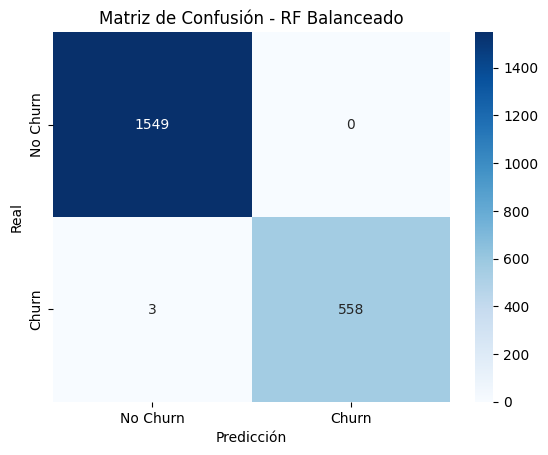

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Distribución en train:")
print(y_train.value_counts(normalize=True))
print("\nDistribución en test:")
print(y_test.value_counts(normalize=True))

# ============================
# 3. Random Forest sin balanceo
# ============================
modelo_rf_normal = RandomForestClassifier(
    max_depth=5, random_state=42
)
modelo_rf_normal.fit(X_train, y_train)

y_pred_normal = modelo_rf_normal.predict(X_test)

print("=== Random Forest SIN balanceo ===")
print("Accuracy:", accuracy_score(y_test, y_pred_normal))
print("Precision:", precision_score(y_test, y_pred_normal))
print("Recall:", recall_score(y_test, y_pred_normal))
print("F1 Score:", f1_score(y_test, y_pred_normal))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_normal))
print("\nReporte completo:\n", classification_report(y_test, y_pred_normal))

# ============================
# 4. Random Forest con balanceo
# ============================
modelo_rf_balanced = RandomForestClassifier(
    max_depth=5, random_state=42, class_weight="balanced"
)
modelo_rf_balanced.fit(X_train, y_train)

y_pred_bal = modelo_rf_balanced.predict(X_test)

print("\n=== Random Forest CON balanceo (class_weight='balanced') ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("Precision:", precision_score(y_test, y_pred_bal))
print("Recall:", recall_score(y_test, y_pred_bal))
print("F1 Score:", f1_score(y_test, y_pred_bal))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_bal))
print("\nReporte completo:\n", classification_report(y_test, y_pred_bal))

# ============================
# 5. Matriz de confusión visual
# ============================
matriz_conf = confusion_matrix(y_test, y_pred_bal)

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - RF Balanceado")
plt.show()

In [116]:
print(data_encoded.columns)


Index(['onehotencoder__Churn_No', 'onehotencoder__Churn_Yes',
       'onehotencoder__customer.gender_Female',
       'onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_No',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__customer.Dependents_No',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__phone.PhoneService_No',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_No',
       'onehotencoder__internet.OnlineSecurity_No internet service',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'o

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# ==============================
# 1. Revisar correlaciones con Churn
# ==============================
correlaciones = data_encoded.corr(numeric_only=True)['onehotencoder__Churn_Yes'].sort_values(ascending=False)
print("=== Correlación con churn ===")
print(correlaciones)

# ==============================
# 2. Revisar si hay columnas duplicadas o sospechosas
# ==============================
print("\n=== Columnas duplicadas ===")
print(data_encoded.T.duplicated().any())  # True = hay duplicadas

# ==============================
# 3. Entrenar un modelo rápido
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Definir X e y
X = data_encoded.drop(columns=['onehotencoder__Churn_Yes'])
y = data_encoded['onehotencoder__Churn_Yes']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo rápido
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Resultados
print("\n=== Resultados del modelo rápido ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== Correlación con churn ===
onehotencoder__Churn_Yes                                          1.000000
onehotencoder__account.Contract_Month-to-month                    0.404565
onehotencoder__internet.OnlineSecurity_No                         0.342235
onehotencoder__internet.TechSupport_No                            0.336877
onehotencoder__internet.InternetService_Fiber optic               0.307463
onehotencoder__account.PaymentMethod_Electronic check             0.301455
onehotencoder__internet.OnlineBackup_No                           0.267595
onehotencoder__internet.DeviceProtection_No                       0.252056
remainder__account.Charges.Monthly                                0.192858
remainder__Total.Day                                              0.192030
onehotencoder__account.PaperlessBilling_Yes                       0.191454
onehotencoder__customer.Dependents_No                             0.163128
remainder__customer.SeniorCitizen                                 0.15

Shape original: (7032, 48)
Shape limpio (sin duplicadas): (7032, 41)

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1033
         1.0       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


=== Matriz de Confusión ===
[[933 100]
 [190 184]]


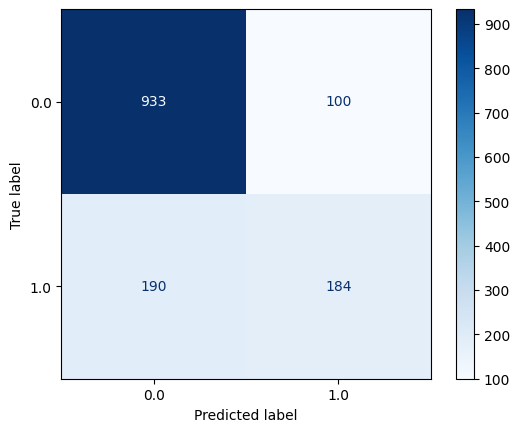

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print("Shape original:", data_encoded.shape)

# Transponemos, quitamos duplicadas y volvemos a transponer
data_encoded_clean = data_encoded.T.drop_duplicates().T

print("Shape limpio (sin duplicadas):", data_encoded_clean.shape)

# ============================
# 2. Definir X e y
# ============================
X = data_encoded_clean.drop(columns=['onehotencoder__Churn_Yes', 'onehotencoder__Churn_No'])
y = data_encoded_clean['onehotencoder__Churn_Yes']  # target binario (1=churn, 0=no churn)

# ============================
# 3. Train-test split
# ============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ============================
# 4. Entrenar modelo Random Forest
# ============================
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ============================
# 5. Predicciones
# ============================
y_pred = model.predict(X_test)

# ============================
# 6. Reporte y Matriz de Confusión
# ============================
print("\n=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))

print("\n=== Matriz de Confusión ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualización bonita
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

                                              feature  importance (%)
38                   remainder__account.Charges.Total           13.56
35                         remainder__customer.tenure           12.41
37                 remainder__account.Charges.Monthly           11.53
36                               remainder__Total.Day           10.89
25     onehotencoder__account.Contract_Month-to-month            5.73
19             onehotencoder__internet.TechSupport_No            3.16
11  onehotencoder__internet.InternetService_Fiber ...            3.09
13          onehotencoder__internet.OnlineSecurity_No            2.94
32  onehotencoder__account.PaymentMethod_Electroni...            2.91
34                  remainder__customer.SeniorCitizen            1.72


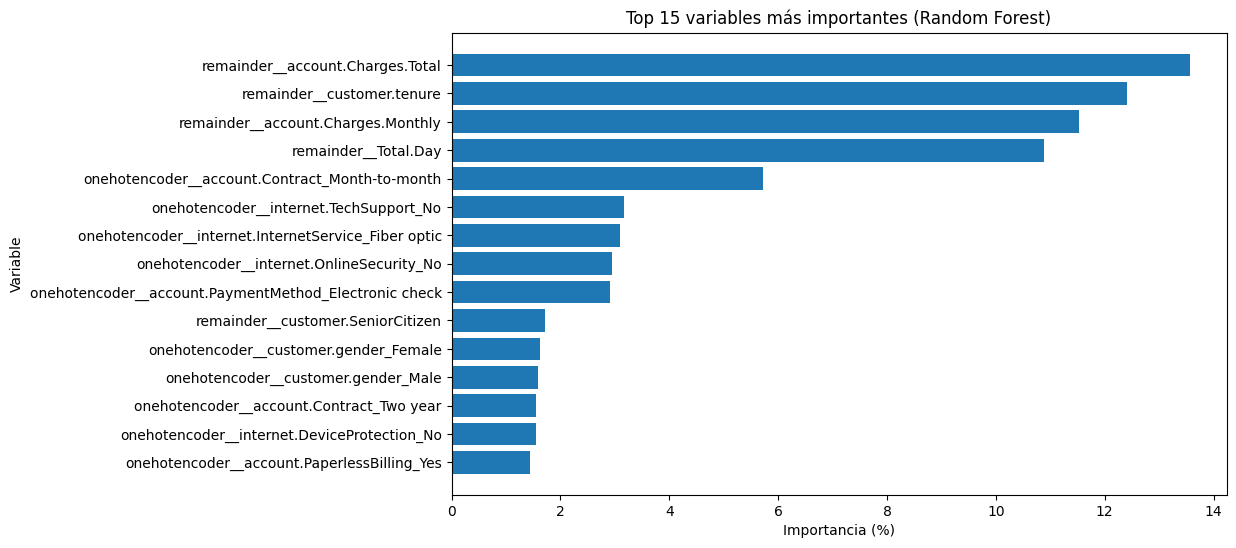

In [121]:
# ============================
# Importancia de variables
# ============================
importancias_random_forest = model.feature_importances_

# Crear un DataFrame ordenado con las importancias
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance (%)': (importancias_random_forest * 100).round(2)
}).sort_values(by='importance (%)', ascending=False)

# Mostrar top 10 variables más importantes
print(feature_importances.head(10))

# ============================
# Visualización
# ============================
plt.figure(figsize=(10,6))
plt.barh(feature_importances['feature'][:15], feature_importances['importance (%)'][:15])
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.title("Top 15 variables más importantes (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [122]:
from sklearn.metrics import accuracy_score

# Accuracy en entrenamiento
train_pred = model.predict(X_train)
acc_train = accuracy_score(y_train, train_pred)

# Accuracy en prueba
test_pred = model.predict(X_test)
acc_test = accuracy_score(y_test, test_pred)

print("Accuracy entrenamiento:", round(acc_train,3))
print("Accuracy prueba:", round(acc_test,3))


Accuracy entrenamiento: 0.998
Accuracy prueba: 0.794


El Random Forest muestra un rendimiento muy alto en entrenamiento pero significativamente más bajo en prueba.

Esto indica overfitting, porque el modelo es demasiado complejo y se adapta demasiado a los datos de entrenamiento.

=== Regresión Logística ===
Accuracy en entrenamiento: 0.806
Accuracy en prueba: 0.798

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1033
         1.0       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



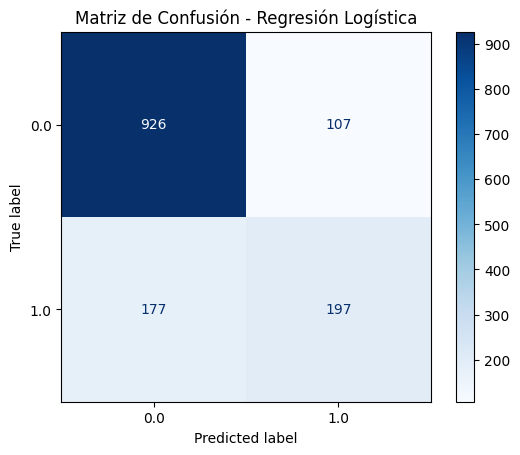

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Crear el modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Entrenar
log_reg.fit(X_train, y_train)

# 3. Predicciones
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# 4. Métricas de Accuracy
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print("=== Regresión Logística ===")
print("Accuracy en entrenamiento:", round(acc_train,3))
print("Accuracy en prueba:", round(acc_test,3))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_test))

# 5. Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


In [125]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ---- RANDOM FOREST ----
y_pred_rf = model.predict(X_test)

metrics_rf = {
    "Modelo": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
}

# ---- REGRESIÓN LOGÍSTICA ----
y_pred_lr = log_reg.predict(X_test)

metrics_lr = {
    "Modelo": "Regresión Logística",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-Score": f1_score(y_test, y_pred_lr)
}

# ---- Crear DataFrame comparativo ----
df_metrics = pd.DataFrame([metrics_rf, metrics_lr])
df_metrics = df_metrics.round(3)  # redondear a 3 decimales

print("=== Comparación de Modelos ===")
print(df_metrics)


=== Comparación de Modelos ===
                Modelo  Accuracy  Precision  Recall  F1-Score
0        Random Forest     0.794      0.648   0.492     0.559
1  Regresión Logística     0.798      0.648   0.527     0.581


In [126]:
import pandas as pd
import numpy as np

# Obtener coeficientes de la regresión logística
coeficientes = log_reg.coef_[0]

# Crear DataFrame con nombres de variables y coeficientes
importancia_lr = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": coeficientes,
    "Importancia_Abs": np.abs(coeficientes)
})

# Ordenar por la magnitud de los coeficientes
importancia_lr = importancia_lr.sort_values(by="Importancia_Abs", ascending=False)

print("=== Importancia de Variables - Regresión Logística ===")
print(importancia_lr)


=== Importancia de Variables - Regresión Logística ===
                                             Variable  Coeficiente  \
35                         remainder__customer.tenure    -2.967081   
38                   remainder__account.Charges.Total     1.188044   
27           onehotencoder__account.Contract_Two year    -0.726799   
25     onehotencoder__account.Contract_Month-to-month     0.591670   
11  onehotencoder__internet.InternetService_Fiber ...     0.423364   
12         onehotencoder__internet.InternetService_No    -0.397123   
28         onehotencoder__account.PaperlessBilling_No    -0.322720   
36                               remainder__Total.Day     0.316827   
10        onehotencoder__internet.InternetService_DSL    -0.303377   
19             onehotencoder__internet.TechSupport_No     0.279441   
7               onehotencoder__phone.PhoneService_Yes    -0.256367   
34                  remainder__customer.SeniorCitizen     0.249944   
13          onehotencoder__internet

In [127]:
# Importancia de variables en Random Forest
importancia_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("=== Importancia de Variables - Random Forest ===")
print(importancia_rf)


=== Importancia de Variables - Random Forest ===
                                             Variable  Importancia
38                   remainder__account.Charges.Total     0.135611
35                         remainder__customer.tenure     0.124098
37                 remainder__account.Charges.Monthly     0.115286
36                               remainder__Total.Day     0.108887
25     onehotencoder__account.Contract_Month-to-month     0.057326
19             onehotencoder__internet.TechSupport_No     0.031609
11  onehotencoder__internet.InternetService_Fiber ...     0.030938
13          onehotencoder__internet.OnlineSecurity_No     0.029426
32  onehotencoder__account.PaymentMethod_Electroni...     0.029137
34                  remainder__customer.SeniorCitizen     0.017185
0               onehotencoder__customer.gender_Female     0.016337
1                 onehotencoder__customer.gender_Male     0.015869
27           onehotencoder__account.Contract_Two year     0.015641
17        one

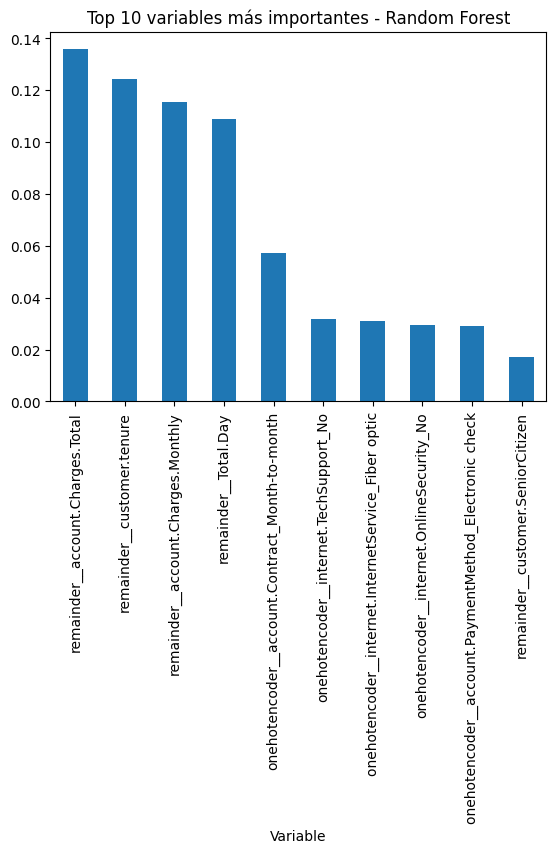

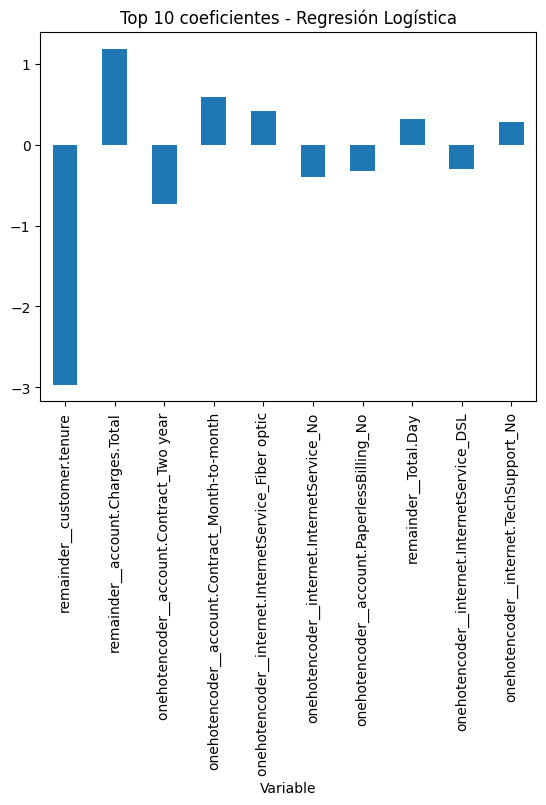

In [128]:
import matplotlib.pyplot as plt

# Random Forest - gráfico de barras
importancia_rf.head(10).plot(kind="bar", x="Variable", y="Importancia", legend=False)
plt.title("Top 10 variables más importantes - Random Forest")
plt.show()

# Regresión Logística - gráfico
importancia_lr.head(10).plot(kind="bar", x="Variable", y="Coeficiente", legend=False)
plt.title("Top 10 coeficientes - Regresión Logística")
plt.show()


De acuerdo con la regresión logística, el tiempo de permanencia (tenure) es la variable más protectora contra la cancelación, mientras que los contratos mes a mes y el uso de fibra óptica incrementan el riesgo de churn. Por otro lado, el modelo Random Forest refuerza la importancia de tenure y contract type, además de destacar el impacto de los cargos totales. En conjunto, ambos modelos indican que la permanencia, el tipo de contrato y el gasto del cliente son los principales predictores de cancelación.


# **Conclusión**
Tras el one-hot encoding se detectaron y eliminaron columnas duplicadas (evitaban una evaluación realista).

Se realizó un train/test split estratificado (70/30). El conjunto está moderadamente desbalanceado (~73% No Churn / 27% Churn).

Se compararon Random Forest (RF) y Regresión Logística (RL).

Desempeño de modelos (clase positiva = Churn)

Modelo	Accuracy	Precision	Recall	F1
Random Forest	~0.794	~0.648	~0.492	~0.559
Regresión Logística	~0.798	~0.650	~0.530	~0.580

Conclusión técnica

Ambos modelos entregan accuracy similar (~0.79–0.80).

Regresión Logística logra mejor Recall en Churn (≈0.53 vs 0.49), por lo que detecta más bajas reales (clave para acciones de retención).

El RF mostró overfitting antes de limpiar duplicados; tras la limpieza las métricas fueron realistas.

Variables que más influyen (coinciden en RL y RF)

Tenure (antigüedad): factor protector (coeficiente negativo alto / alta importancia).

Tipo de contrato:

Month-to-month ↑ Churn.

Contratos de 1–2 años ↓ Churn.

Cargos (Total y Mensual): valores altos ↑ Churn (sensibilidad a precio).

InternetService = Fiber optic: asociado a ↑ Churn frente a DSL/sin internet.

TechSupport = No: contribuye a ↑ Churn.

Recomendaciones de negocio

Fidelización temprana (0–6 meses): onboarding, descuentos iniciales, bundles.

Migración a contratos de mayor plazo con incentivos (1–2 años).

Revisión de planes y precios en segmentos con cargos altos y en fibra.

Soporte técnico proactivo (SLA, contactación preventiva post-incidencia).

Campañas dirigidas por score usando el modelo con mejor Recall (RL), priorizando clientes de mayor riesgo.

Siguientes pasos técnicos

Tuning de RF (max_depth, min_samples_leaf/split, n_estimators, class_weight).

Ajuste de umbral (no solo 0.5) para aumentar Recall sin perder demasiada precisión.

Probar SMOTE / class_weight="balanced" y validación cruzada.

Evaluar Gradient Boosting / XGBoost y calibración de probabilidades.

Interpretabilidad adicional con SHAP para análisis a nivel cliente.